# Présentation des données
Nous avons choisi de nous concentrer sur les stations de la france métropolitaine pour visualiser plus simplement les stations sur une carte et assurer une cohérence géographique entre les climats. Les stations d'outremer proposent également des mesures moins bien répartis dans le temps avec parfois de grands intervals de temps entre chaque mesure.

<p float="left">
  <img src="../fig/heatmap_points_Humidit_.png" width="450" />
  <img src="../fig/heatmap_points_Pr_cipitations_dans_les_24_derni_res_heures.png" width="450" />
  <img src="../fig/heatmap_points_Temp_rature.png" width="450" />
</p>

Comme attendu les lieux les moins humides, les plus chauds et ou il y a le moins d'humidité sont dans le sud de la France. On constate aussi que le nord de la France est en moyenne plus froide que le sud et la bretagne plus sujet aux précipitations que ce soit en volume ou en fréquence.

## Matrice de corrélation

Après avoir nettoyé les données nous avons effectué des calculs de corrélarions entre variables. 

In [11]:
source('corr.R')

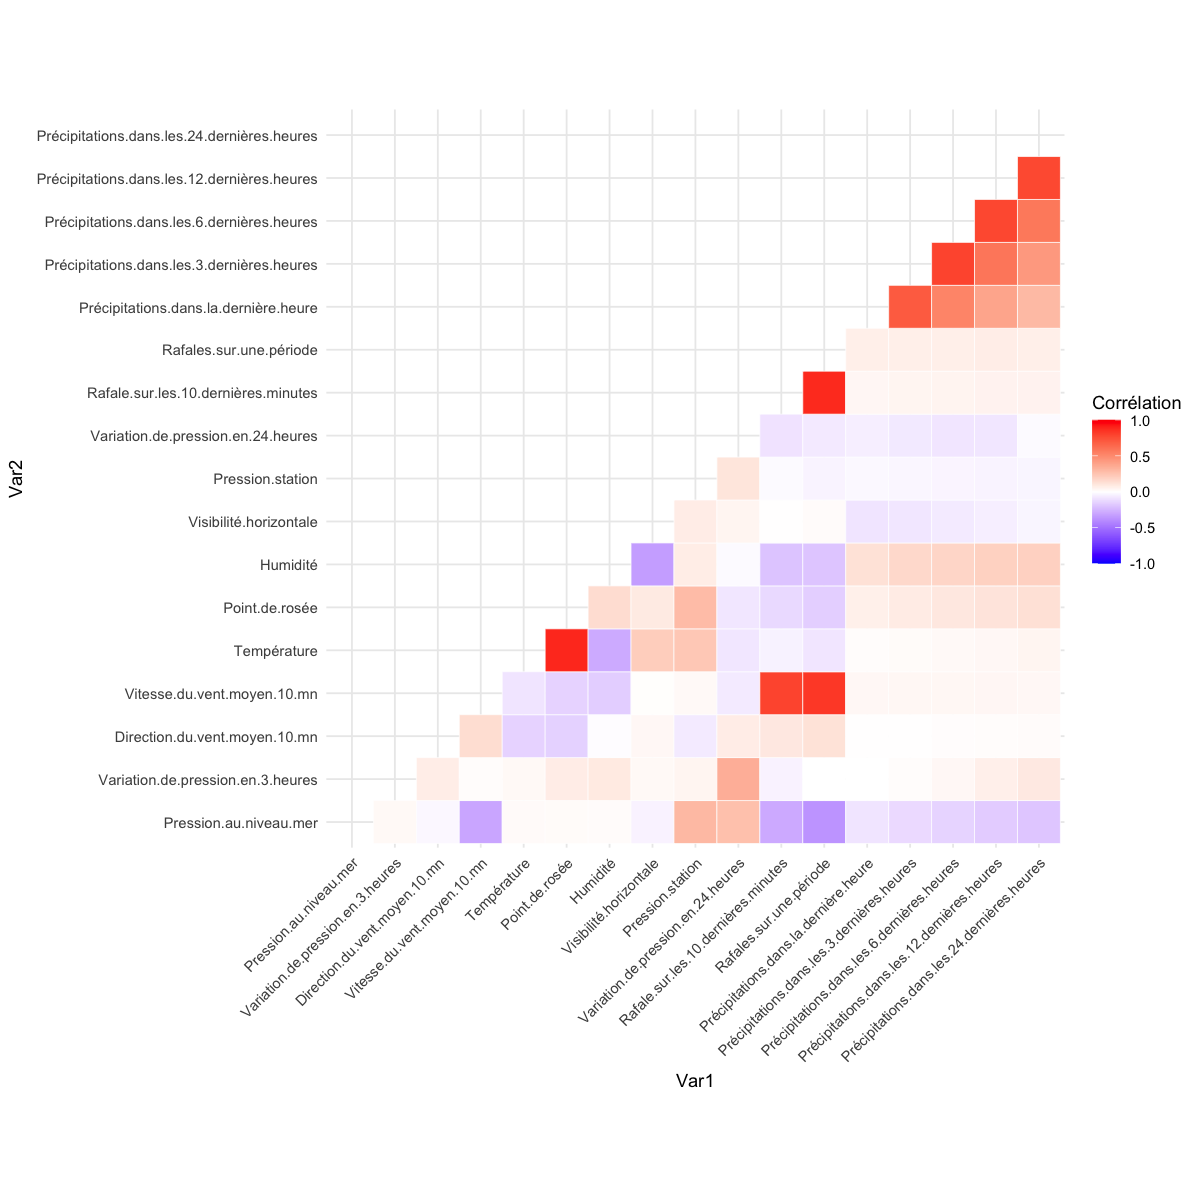

In [21]:
res <- analyze_correlations("../csv/observations_cleaned.csv")
options(repr.plot.width = 10, repr.plot.height = 10)
res$plot

Cette matrice de corrélation a été calculée sur l'ensemble des données d'observations de France métropolitaine.
On observe certaines corrélations évidentes comme celles entre les différentes précipitations pendant les dernières $n$ heures. 
Pour effectuer une régression ou un clusters on pourrait supprimer certaines variables redondantes.

In [22]:
head(res$correlations)  

,Var1,Var2,Corr
,<fct>,<fct>,<dbl>
1,Point.de.rosée,Température,0.8952098
2,Rafales.sur.une.période,Rafale.sur.les.10.dernières.minutes,0.8859623
3,Rafales.sur.une.période,Vitesse.du.vent.moyen.10.mn,0.8393475
4,Précipitations.dans.les.6.dernières.heures,Précipitations.dans.les.3.dernières.heures,0.7975094
5,Rafale.sur.les.10.dernières.minutes,Vitesse.du.vent.moyen.10.mn,0.7957731
6,Précipitations.dans.les.12.dernières.heures,Précipitations.dans.les.6.dernières.heures,0.7832608


Cette cellule affiche les 5 variables les plus corrélées.

# ACP

In [44]:
source('acp.R')

### ACP pour une station (NICE)

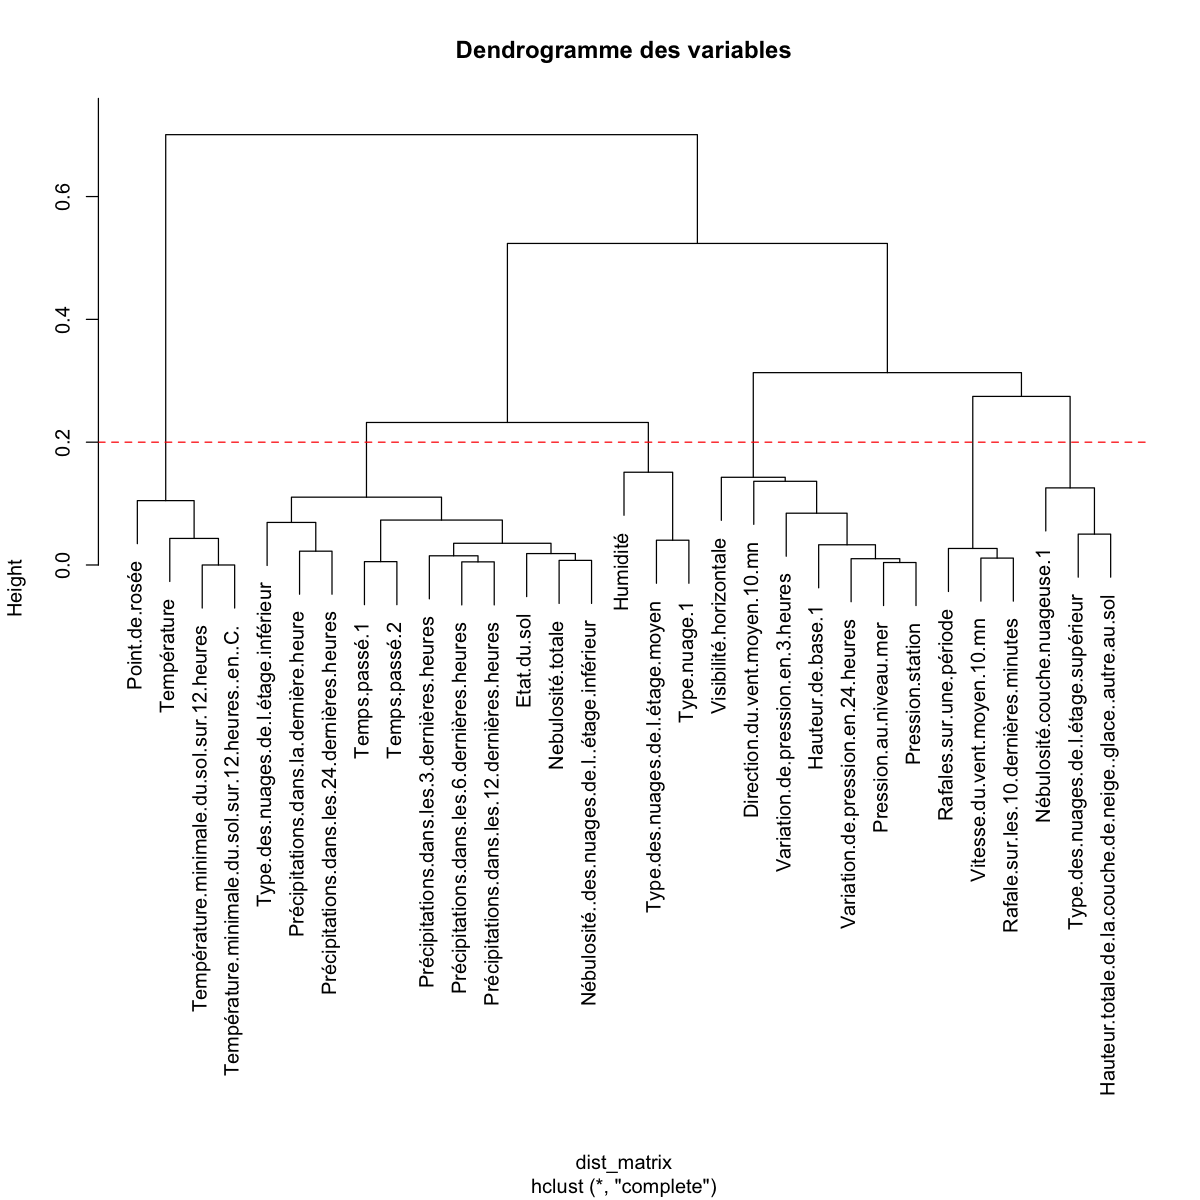

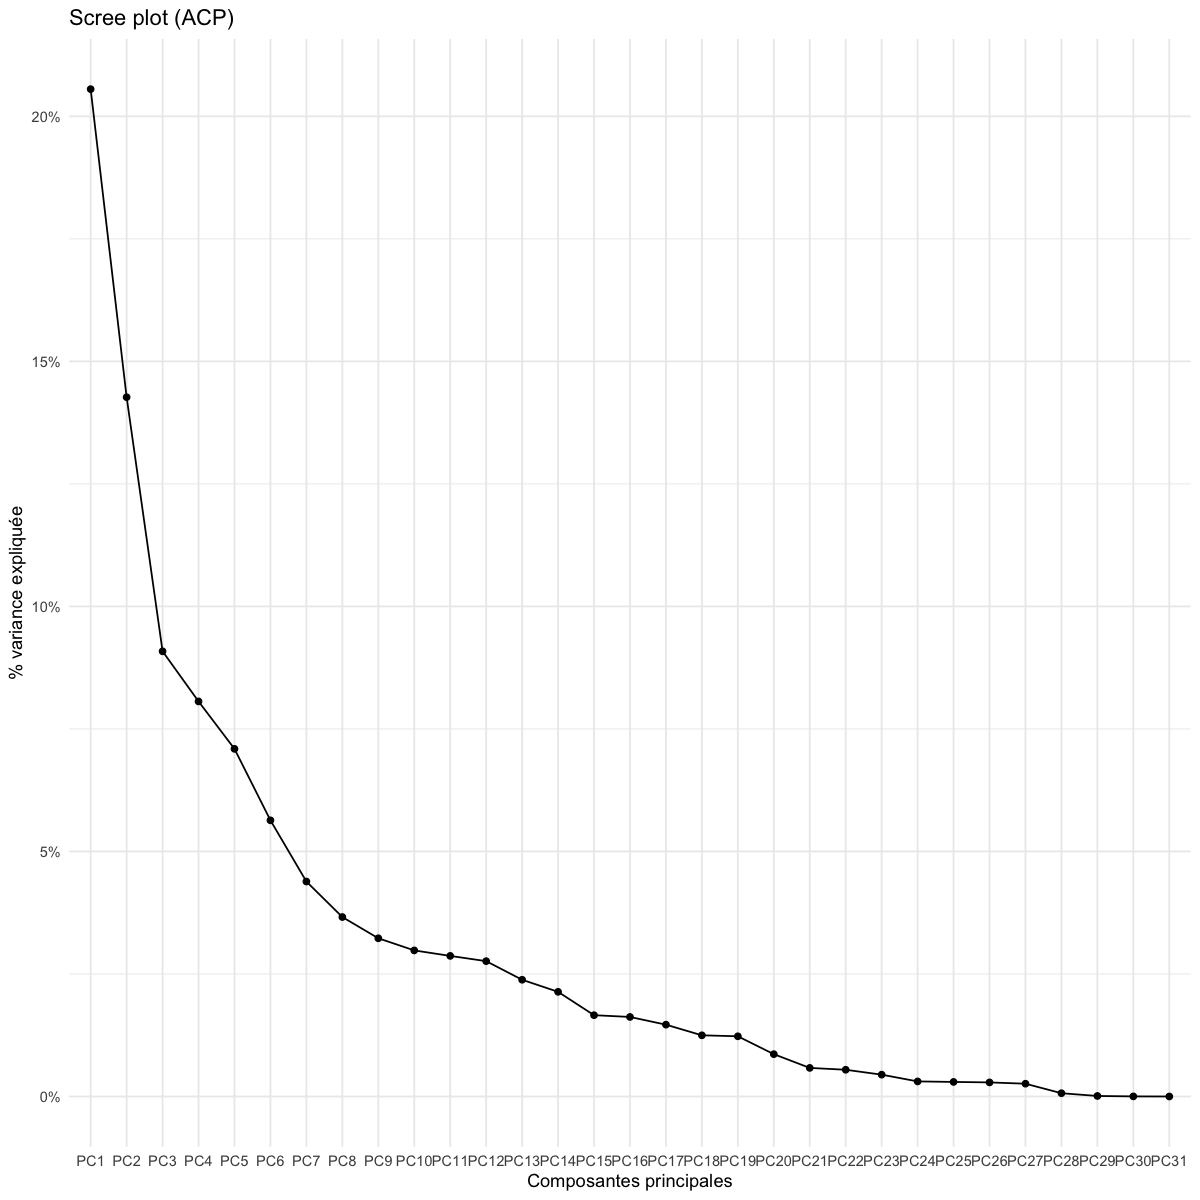

In [48]:
# Définir l'ID de la station
id <- 7690

# Construire le chemin et le préfixe dynamiquement
file_path   <- paste0("../csv/station_", id, "_obs_cleaned.csv")

# Appel de la fonction
res <- pca_with_season_plots(
  file_path      = file_path,
  seuil_distance = 0.2,
)
# Afficher les graphiques dans R

res$plots$scree


Les deux première composantes principales expliquent environ 35% de la variance, ce qui ne permer d'avoir une visualisation lisible en 2D.

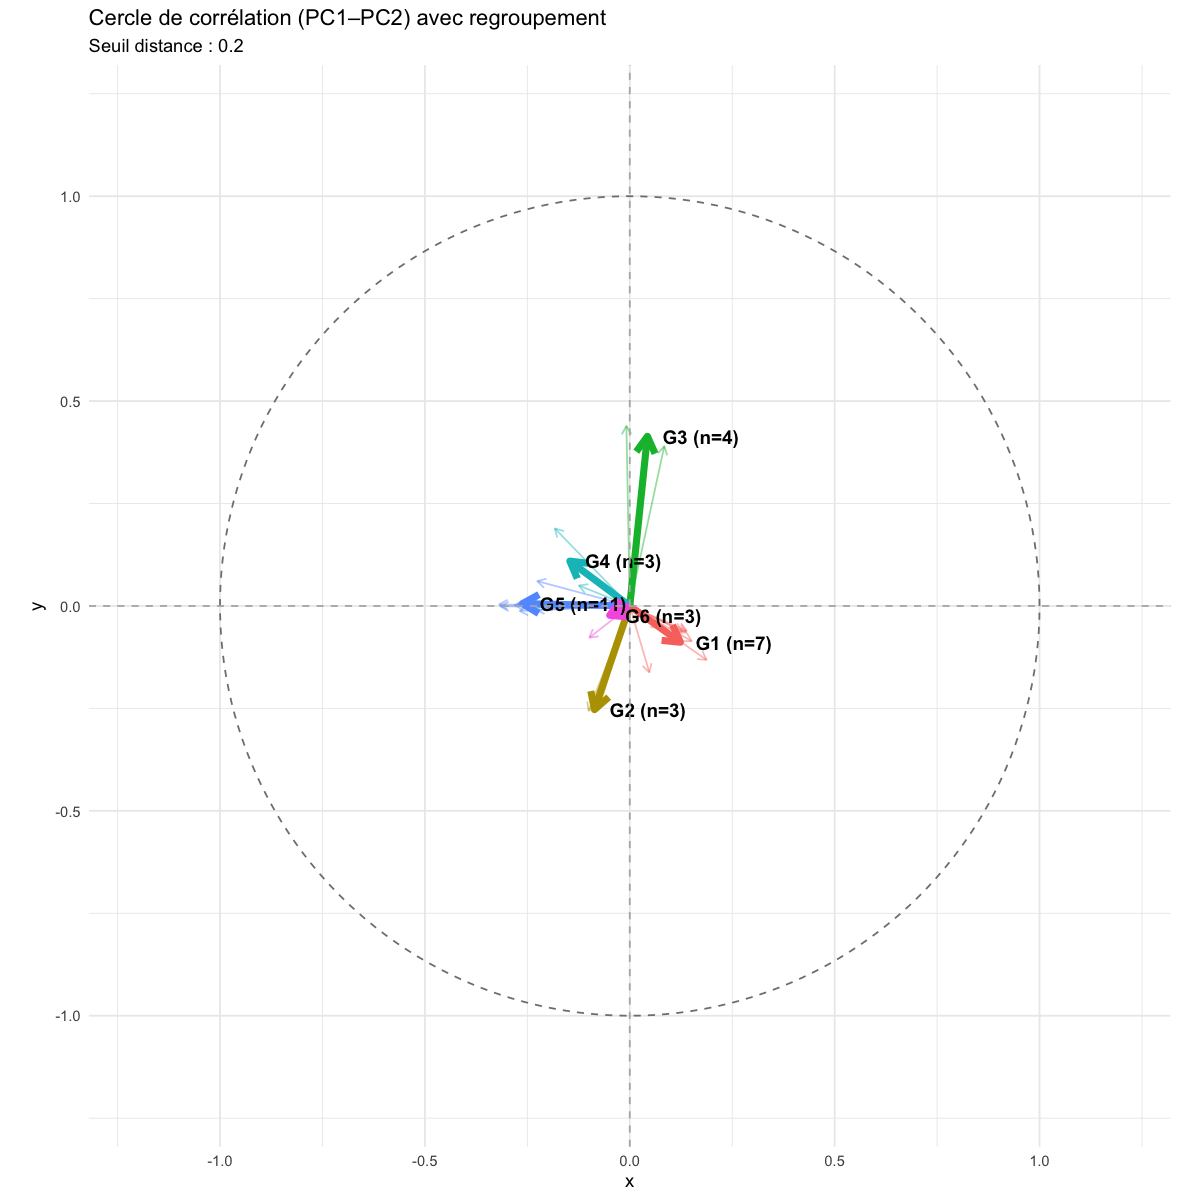

In [46]:
res$plots$circle

Nous avons fait des groupes de variables puisqu'au total 31 variables étaient considérées pour cette station ce qui diminuait nettement la visiblité du graphique des projections des variables dans le plan principal

In [49]:
groupes = res$groupes
loadings_df = res$loadings
  cat("\n=== Détail des groupes ===\n")
    for(g in unique(groupes)) {
    cat("\nGroupe", g, ":\n")
    vars_g <- loadings_df$var[loadings_df$groupe == g]
    cat(paste(vars_g, collapse = "\n"), "\n")
  }


=== Détail des groupes ===

Groupe 1 :
Pression.au.niveau.mer
Variation.de.pression.en.3.heures
Direction.du.vent.moyen.10.mn
Visibilité.horizontale
Pression.station
Variation.de.pression.en.24.heures
Hauteur.de.base.1 

Groupe 2 :
Vitesse.du.vent.moyen.10.mn
Rafale.sur.les.10.dernières.minutes
Rafales.sur.une.période 

Groupe 3 :
Température
Point.de.rosée
Température.minimale.du.sol.sur.12.heures
Température.minimale.du.sol.sur.12.heures..en..C. 

Groupe 4 :
Humidité
Type.des.nuages.de.l.étage.moyen
Type.nuage.1 

Groupe 5 :
Temps.passé.1
Temps.passé.2
Nebulosité.totale
Nébulosité..des.nuages.de.l..étage.inférieur
Type.des.nuages.de.l.étage.inférieur
Etat.du.sol
Précipitations.dans.la.dernière.heure
Précipitations.dans.les.3.dernières.heures
Précipitations.dans.les.6.dernières.heures
Précipitations.dans.les.12.dernières.heures
Précipitations.dans.les.24.dernières.heures 

Groupe 6 :
Type.des.nuages.de.l.étage.supérieur
Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol
Nébulo

Nous avons ensuite représenté les observations dans le plan principal coloré par saison

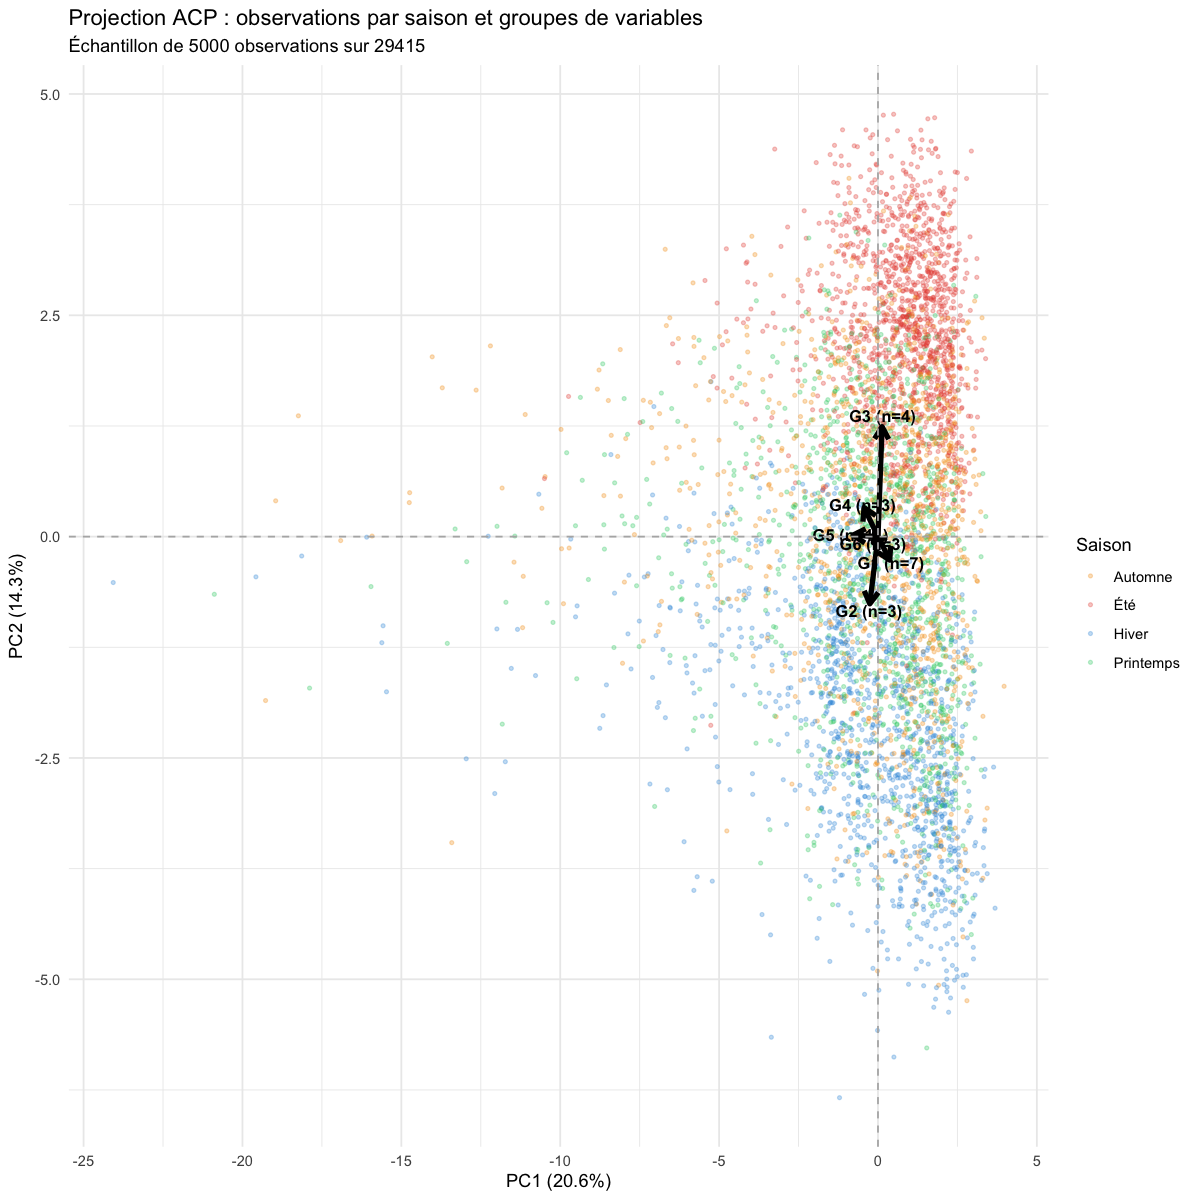

In [52]:
res$plots$all_seasons


On passe progressivement de l'hiver vers l'été en suivant l'axe principale PC2. Les variables aident le plus à séparer les groupes étant le groupe 3, lié à la température et le groupe 4 ne comprenant que l'humidité.
C'est cohérent puisque l'humidité augmente en hiver et température augmente en été et inversement.

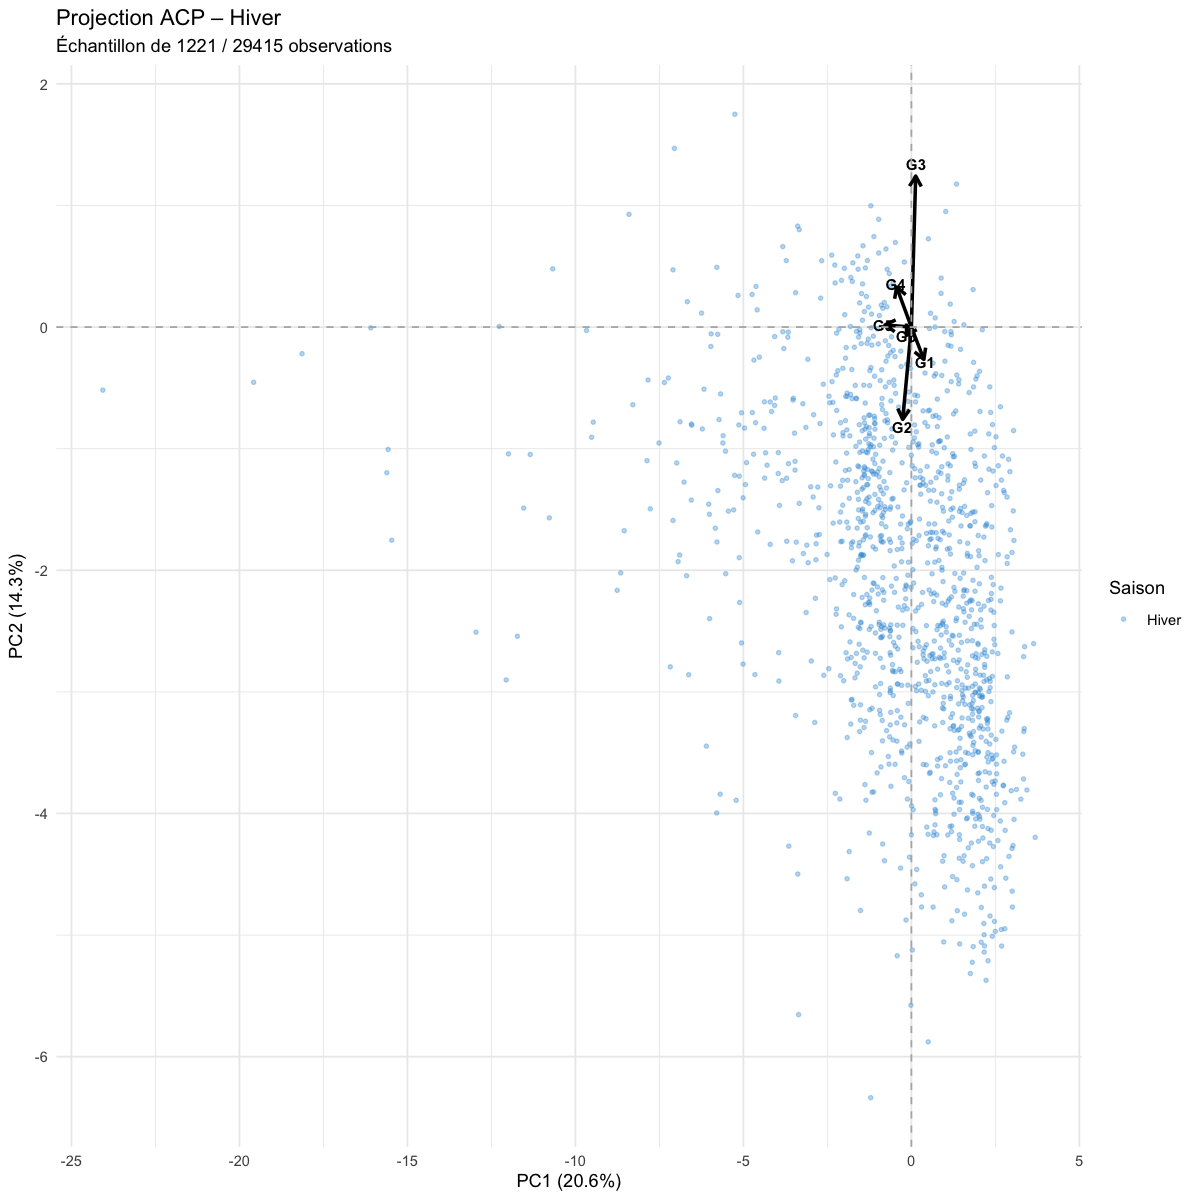

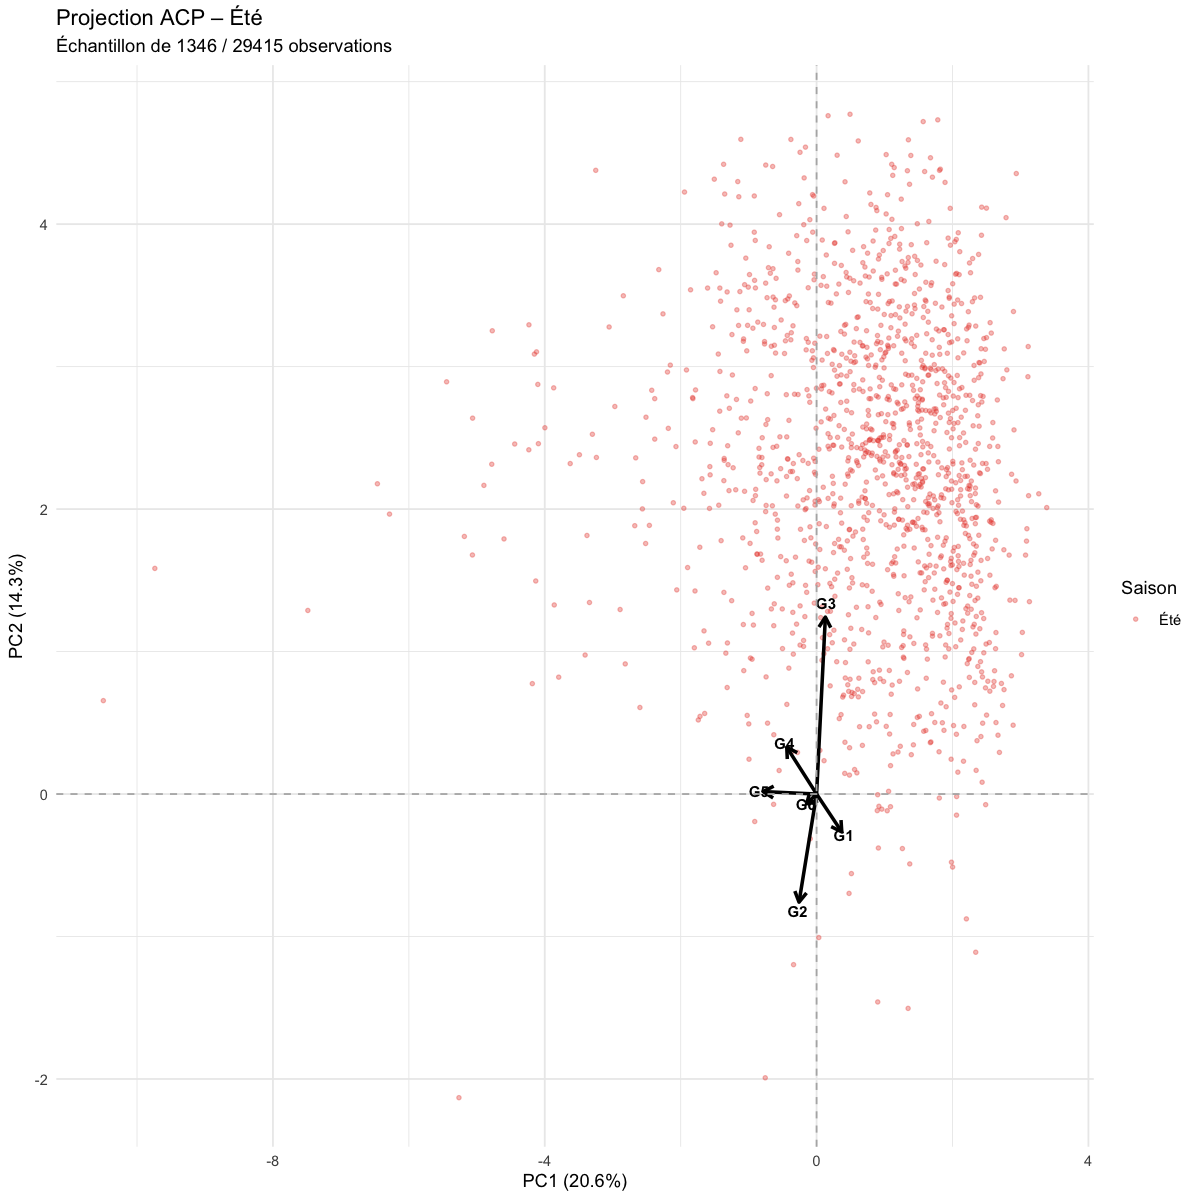

In [53]:
res$plots$by_season$Hiver
res$plots$by_season$`Été`

En faisant deux graphiques séparés on observe plus nettement la séparation entre les deux saisons.

# AFD

A partir des labels obtenus des 4 saisons nous avons essayé de faire une AFD pour chercher les directions qui permettaient au mieux de discriminer les observations selon les saisons.
Nous avons réalisé cette dernière sur l'ensemble des données d'observations.

In [58]:
source('adf.R')

In [61]:
file_path   <- paste0("../csv/observations_cleaned.csv")

res_afd <- afd_with_season_plots(
  file_path      = file_path,
  seuil_distance = 0.2,
)

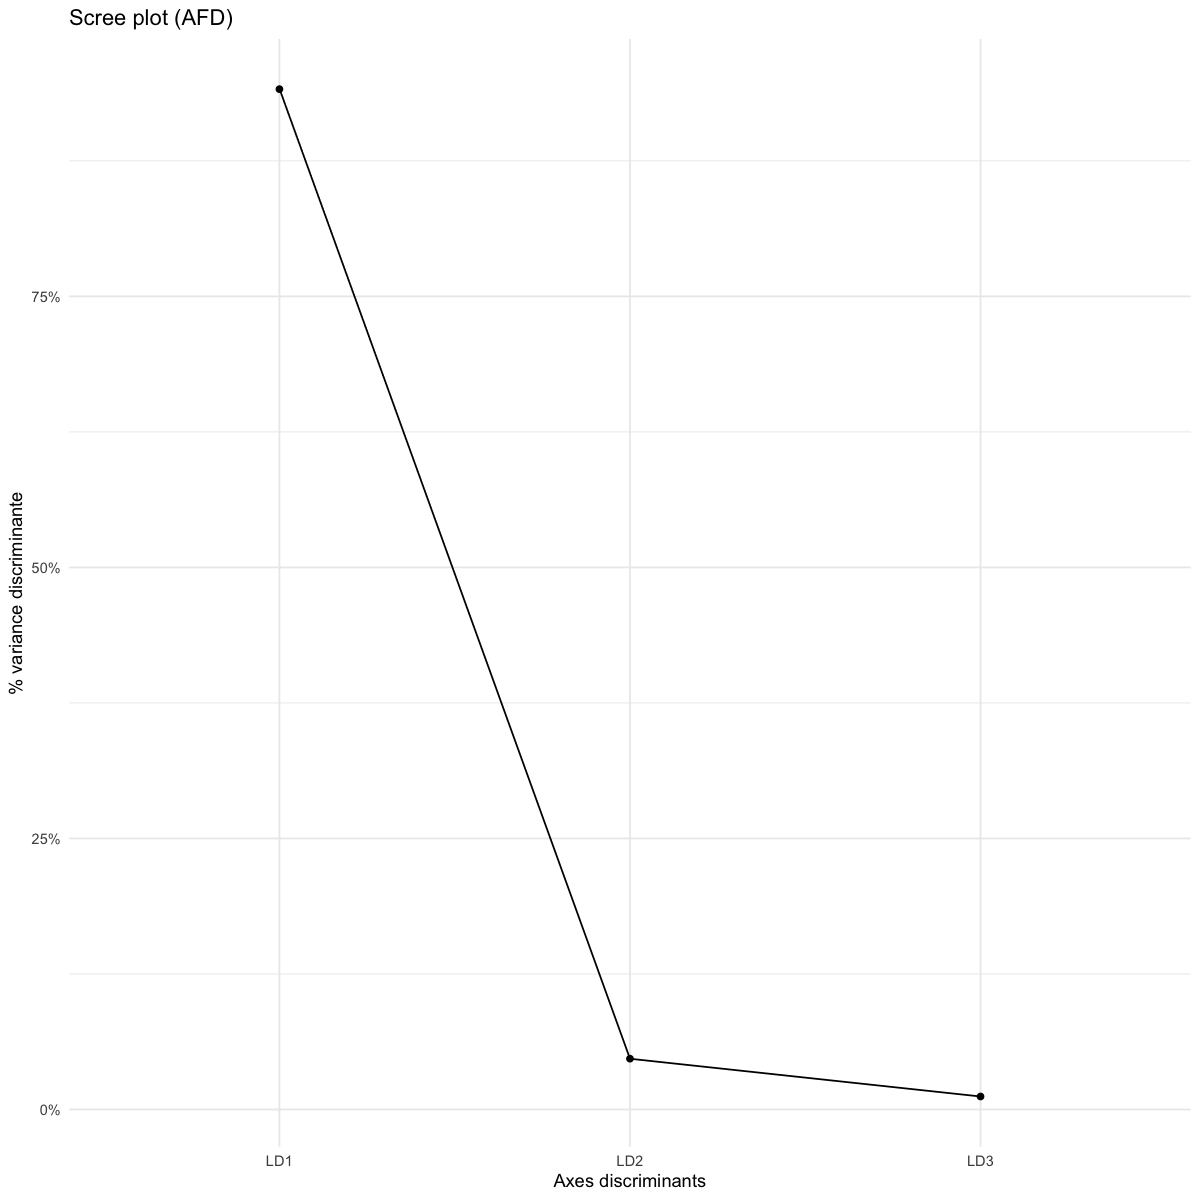

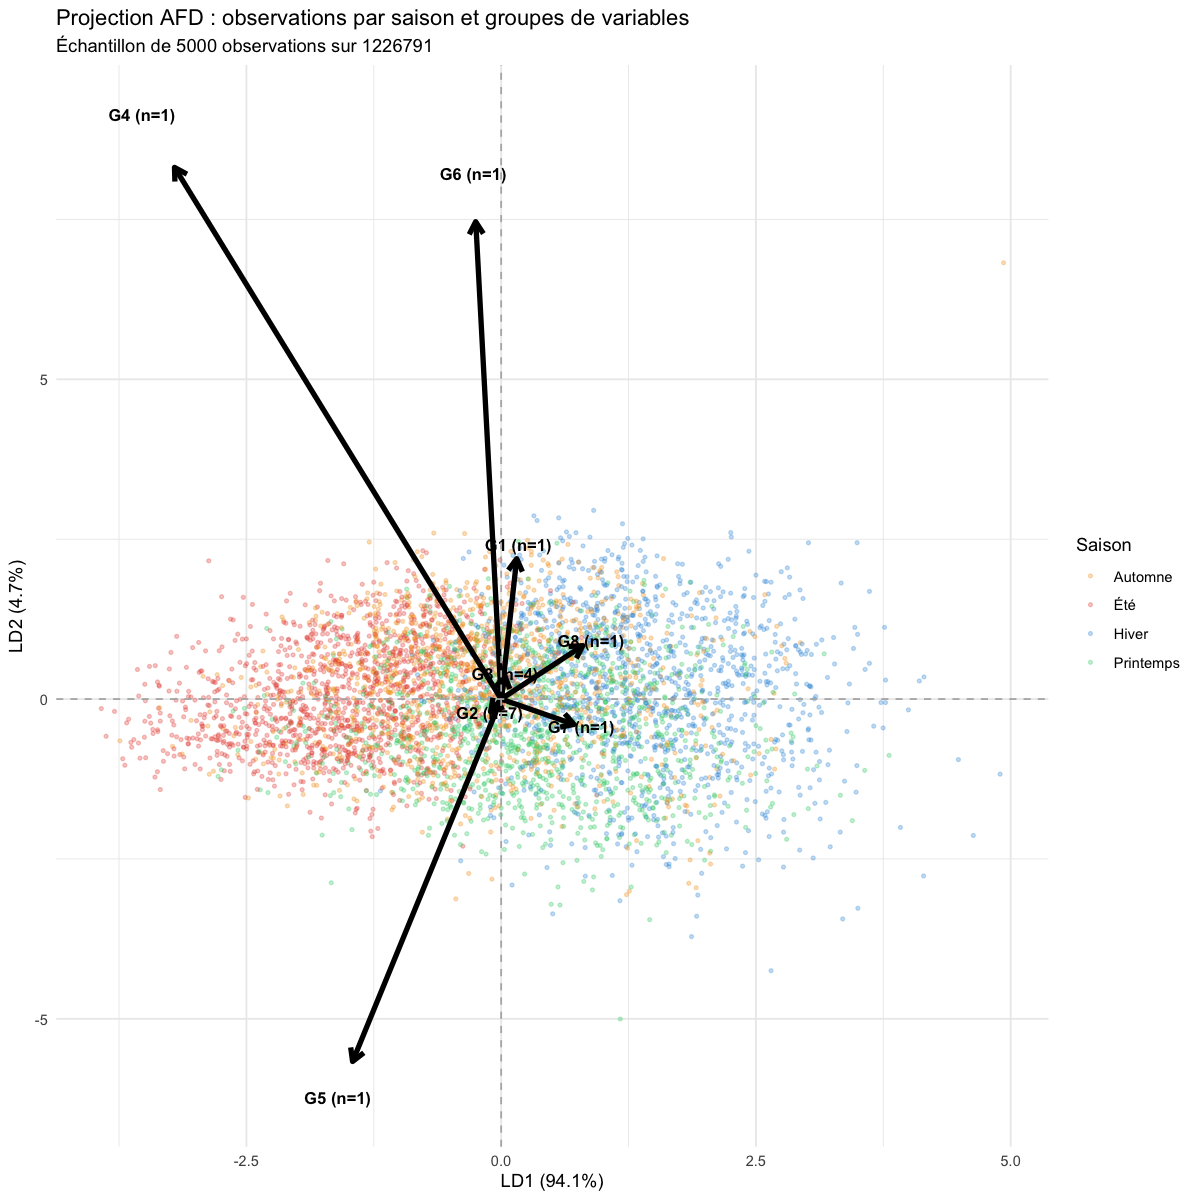

In [ ]:
res_afd$plots$scree
res_afd$plots$all_seasons

Le premier axe discriminant permet d'expliquer la variance inter-groupes à 94,1%, on aurait presque pu faire un visualisaiton en 1D pour discriminer les saisons

$`1`
[1] "Pression.au.niveau.mer"

$`2`
[1] "Variation.de.pression.en.3.heures"          
[2] "Vitesse.du.vent.moyen.10.mn"                
[3] "Variation.de.pression.en.24.heures"         
[4] "Précipitations.dans.la.dernière.heure"      
[5] "Précipitations.dans.les.3.dernières.heures" 
[6] "Précipitations.dans.les.6.dernières.heures" 
[7] "Précipitations.dans.les.12.dernières.heures"

$`3`
[1] "Direction.du.vent.moyen.10.mn"              
[2] "Visibilité.horizontale"                     
[3] "Rafale.sur.les.10.dernières.minutes"        
[4] "Précipitations.dans.les.24.dernières.heures"

$`4`
[1] "Température"

$`5`
[1] "Point.de.rosée"

$`6`
[1] "Humidité"

$`7`
[1] "Pression.station"

$`8`
[1] "Rafales.sur.une.période"

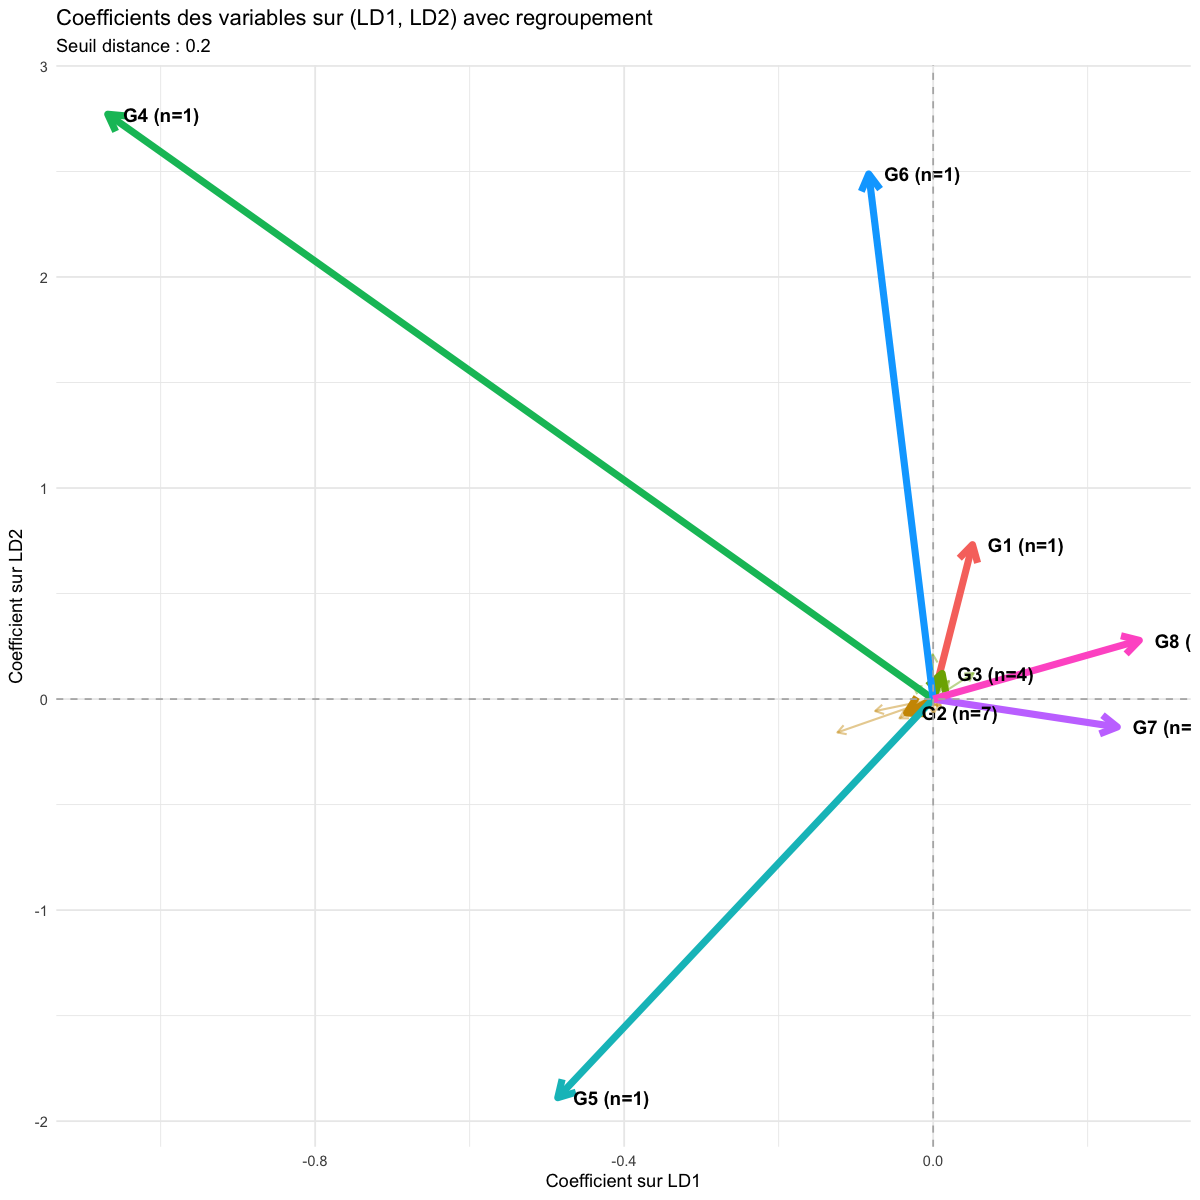

In [68]:
res_afd$plots$coefficients
res_afd$groupes

Pour améliorer la lisibilité du graphique, nous avons également réalisé un clustering des variables exprimées dans le plan principal.

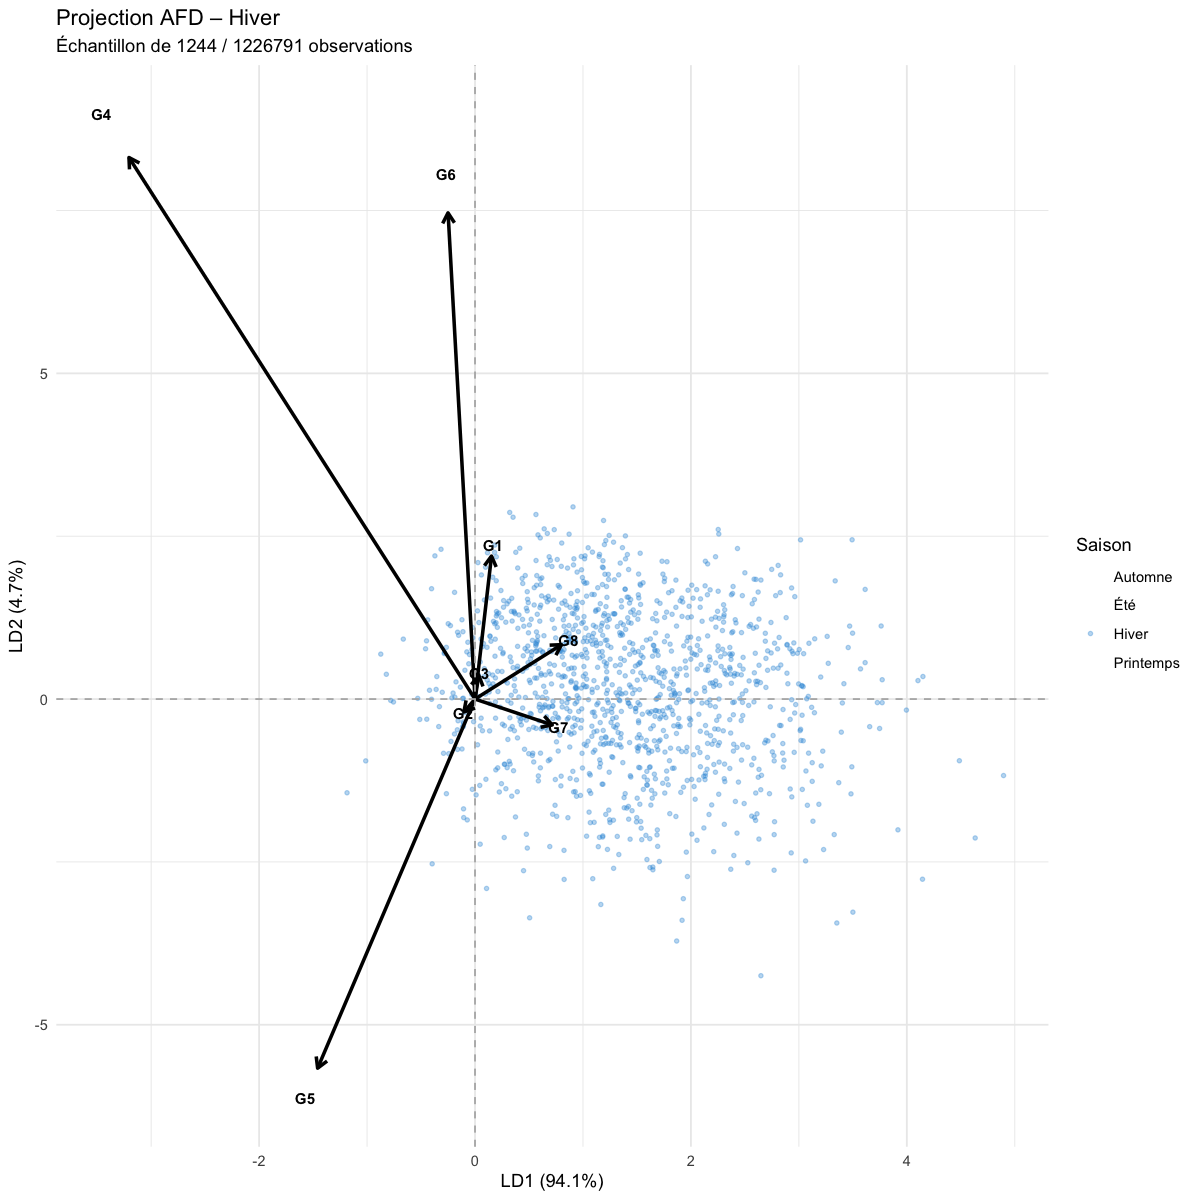

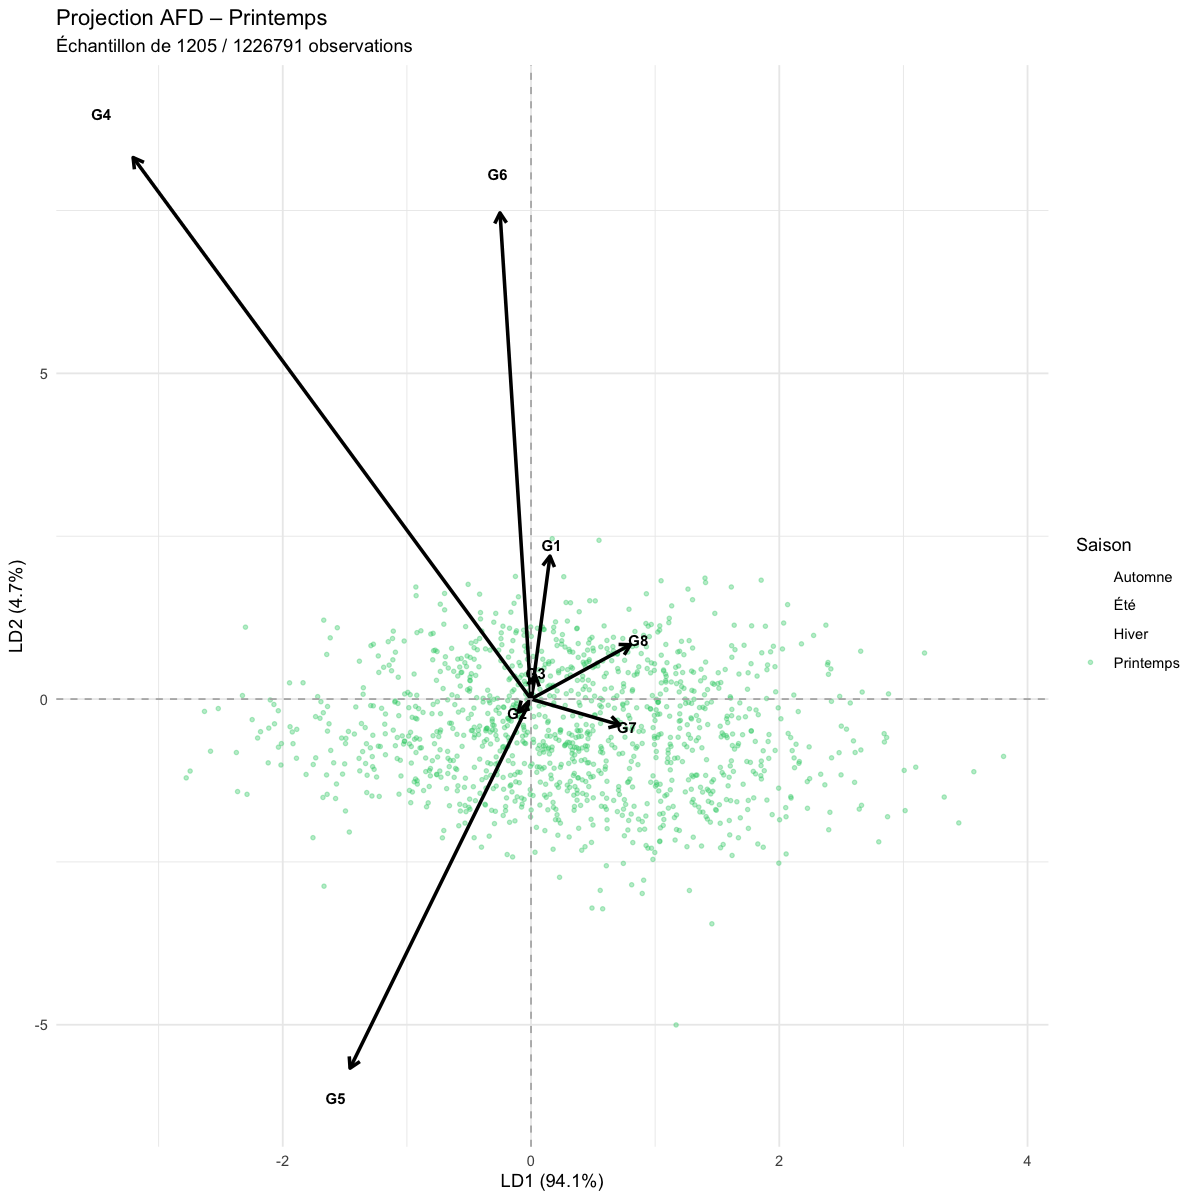

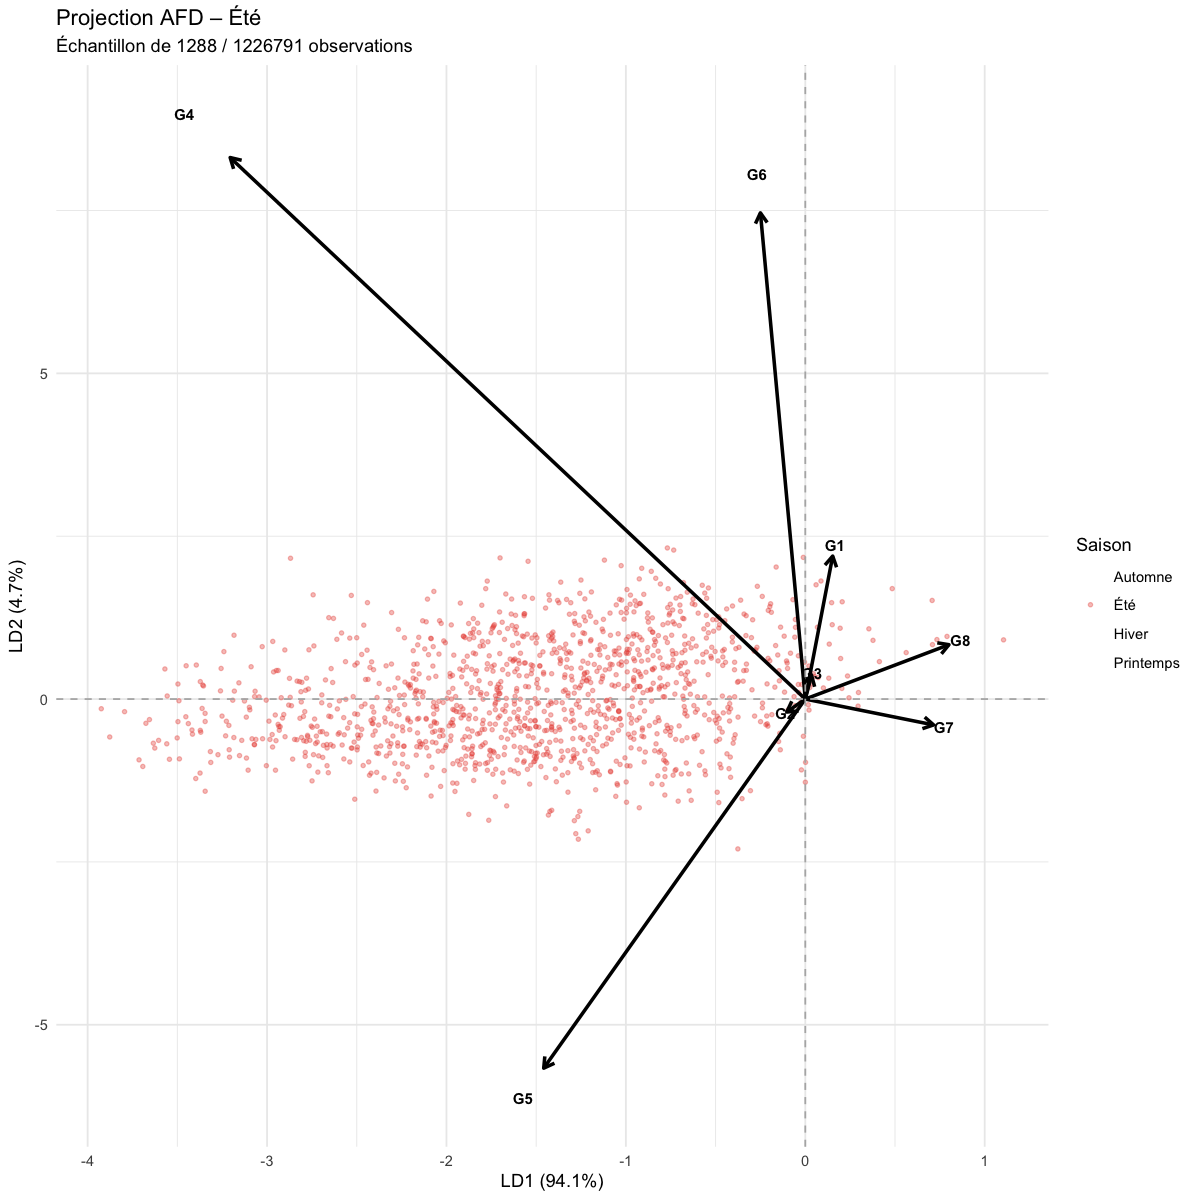

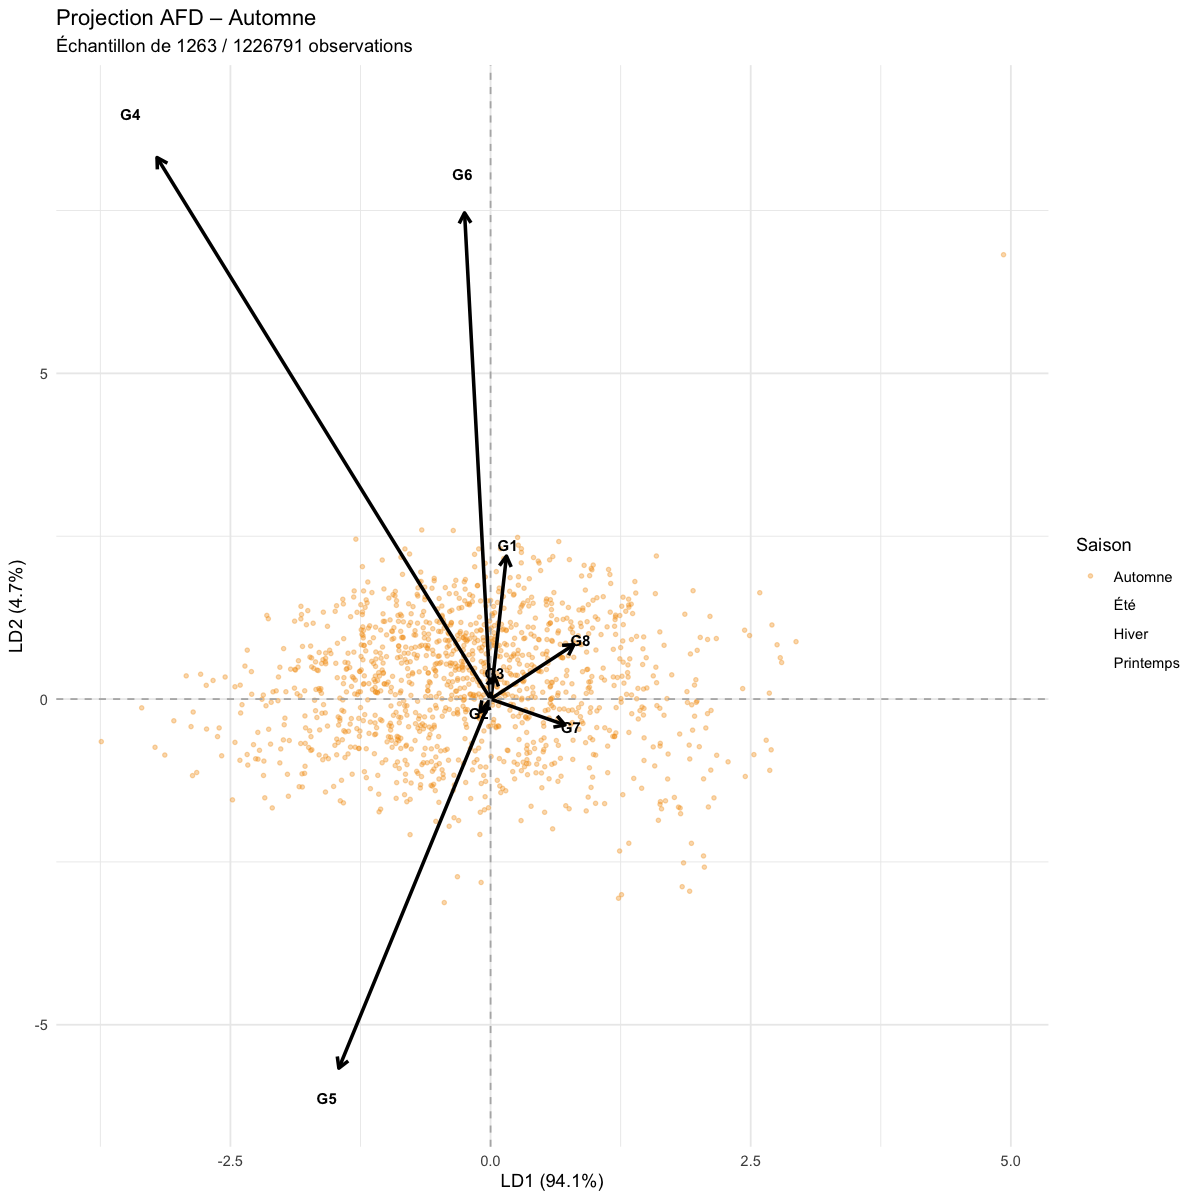

In [69]:
res_afd$plots$by_season$Hiver
res_afd$plots$by_season$Printemps
res_afd$plots$by_season$`Été`
res_afd$plots$by_season$Automne



Comme précédemment on observe que l'été et l'hiver se distingue facilement alors que la séparation entre le printemps et l'automne n'est pas très visible. Ceci peut s'expliquer par le fait que ce sont deux entre-saisons.